In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as cp
import os, sys

## Load test set

In [3]:
ROOT_DIR = ".."
FILENAME = "test_set_and_predictions.pkl"

In [5]:
with open(os.path.join(ROOT_DIR, FILENAME), 'rb') as infile:
    ds_test = cp.load(infile)

## Load results -- events detection

In [7]:
FILENAME = "results_v3.tsv"
df_preds = pd.read_csv(os.path.join(ROOT_DIR, FILENAME), header=0, sep="\t")
df_preds.head()

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
0,pp061,M,24,YA,Slow,NaN,right_shank,IC,1416.0,1414.0,2.0,10.0,1,1,1,0,0,1
1,pp061,M,24,YA,Slow,NaN,right_shank,FC,70.0,78.0,-8.0,-40.0,1,1,1,0,0,1
2,pp061,M,24,YA,Slow,NaN,right_shank,FC,370.0,371.0,-1.0,-5.0,1,1,1,0,0,1
3,pp061,M,24,YA,Slow,NaN,right_shank,FC,679.0,NaN,NaN,NaN,1,0,0,1,0,1
4,pp061,M,24,YA,Slow,NaN,right_shank,FC,982.0,986.0,-4.0,-20.0,1,1,1,0,0,1


In [18]:
print(f"{'Group':>8s}{'Gender':>8s}{'TP':>8s}{'FN':>8s}{'FP':>8s}{'recall':>8s}{'prec':>8s}")
for k, df in df_preds.groupby(["participant_type", "gender", "event_type"]):
    recall = df['TP'].sum() / ( df['TP'].sum() + df['FN'].sum() ) * 100
    precision = df['TP'].sum() / ( df['TP'].sum() + df['FP'].sum() ) * 100
    print(f"{k[0]:>8s}{k[1]:>8s}{df['TP'].sum():>8d}{df['FN'].sum():>8d}{df['FP'].sum():>8d}{recall:>8.1f}{precision:>8.1f}")

   Group  Gender      TP      FN      FP  recall    prec
      MS       F     227      23       6    90.8    97.4
      MS       F     232      24       7    90.6    97.1
      MS       M     239      27       5    89.8    98.0
      MS       M     259       9       8    96.6    97.0
      OA       F     140       8       9    94.6    94.0
      OA       F     142       6       3    95.9    97.9
      OA       M      96       2       0    98.0   100.0
      OA       M      93       3       2    96.9    97.9
      PD       F     301       5       7    98.4    97.7
      PD       F     286      30       1    90.5    99.7
      PD       M     452      32       5    93.4    98.9
      PD       M     474      14       3    97.1    99.4
      YA       F     306      30       9    91.1    97.1
      YA       F     329       7       0    97.9   100.0
      YA       M     311      15       4    95.4    98.7
      YA       M     327       3       2    99.1    99.4
    cLBP       F      48       

In [19]:
df_sel = df_preds.loc[(df_preds['participant_type']=="MS")]

In [22]:
print(f"{'Group':>8s}{'Gender':>8s}{'TP':>8s}{'FN':>8s}{'FP':>8s}{'recall':>8s}{'prec':>8s}")
for k, df in df_sel.groupby(["sub_id", "event_type"]):
    recall = df['TP'].sum() / ( df['TP'].sum() + df['FN'].sum() ) * 100
    precision = df['TP'].sum() / ( df['TP'].sum() + df['FP'].sum() ) * 100
    print(f"{k[0]:>8s}{k[1]:>8s}{df['TP'].sum():>8d}{df['FN'].sum():>8d}{df['FP'].sum():>8d}{recall:>8.1f}{precision:>8.1f}")

   Group  Gender      TP      FN      FP  recall    prec
   pp029      FC      62       2       1    96.9    98.4
   pp029      IC      63       1       0    98.4   100.0
   pp058      FC     106      24       4    81.5    96.4
   pp058      IC     128       4       8    97.0    94.1
   pp078      FC      71       1       0    98.6   100.0
   pp078      IC      68       4       0    94.4   100.0
   pp126      FC      51       9       2    85.0    96.2
   pp126      IC      53       9       0    85.5   100.0
   pp155      FC      46       4       2    92.0    95.8
   pp155      IC      47       5       2    90.4    95.9
   pp156      FC      80      10       1    88.9    98.8
   pp156      IC      85       7       5    92.4    94.4
   pp167      FC      50       0       1   100.0    98.0
   pp167      IC      47       3       0    94.0   100.0


In [23]:
df_sel = df_preds.loc[(df_preds["sub_id"]=="pp058")]

In [28]:
print(f"{'Task':>12s}{'Run':>8s}{'IC/FC':>8s}{'TP':>8s}{'FN':>8s}{'FP':>8s}{'recall':>8s}{'prec':>8s}")
for k, df in df_sel.groupby(["task", "run", "event_type"]):
    recall = df['TP'].sum() / ( df['TP'].sum() + df['FN'].sum() ) * 100
    precision = df['TP'].sum() / ( df['TP'].sum() + df['FP'].sum() ) * 100
    print(f"{k[0]:>12s}{k[1]:>8s}{k[2]:>8s}{df['TP'].sum():>8d}{df['FN'].sum():>8d}{df['FP'].sum():>8d}{recall:>8.1f}{precision:>8.1f}")

        Task     Run   IC/FC      TP      FN      FP  recall    prec
        Fast   schub      FC      13       3       1    81.2    92.9
        Fast   schub      IC      15       1       1    93.8    93.8
   Preferred   schub      FC      15       5       2    75.0    88.2
   Preferred   schub      IC      19       1       1    95.0    95.0
        Slow   schub      FC      39       3       0    92.9   100.0
        Slow   schub      IC      41       1       0    97.6   100.0


In [101]:
# sub_id = 'pp003'
sub_id = 'pp058'
task   = 'walkPreferred'
run    = ''
# run    = 'schub'
filename_prefix = 'sub-'+sub_id+'_task-'+task + '_run-' + run if len(run) > 0 else 'sub-'+sub_id+'_task-'+task
print(filename_prefix)

sub-pp058_task-walkPreferred


In [103]:
ix_examples = [ix for ix in range(len(ds_test)) if filename_prefix in ds_test[ix]['filename_prefix']]
print(ix_examples)

[276, 277, 278, 279, 280, 281, 282, 283]


279 right_shank sub-pp058_task-walkPreferred


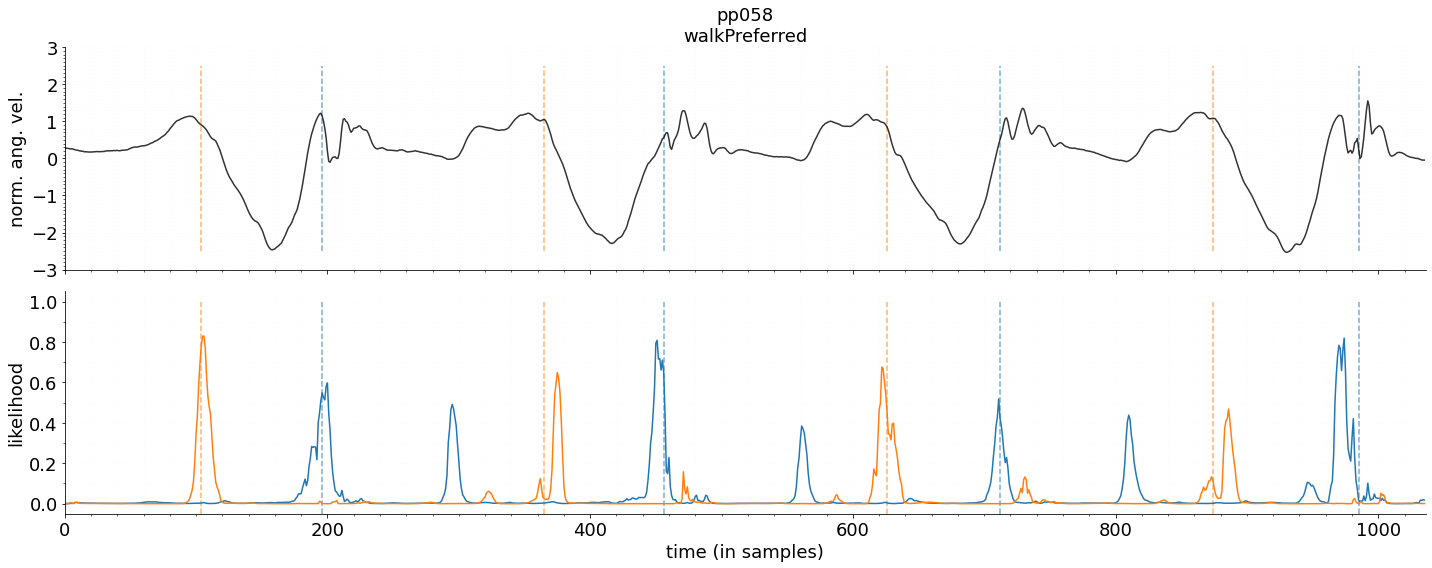

In [109]:
for ix in ix_examples[3:4]:
    print(ix, ds_test[ix]['tracked_point'], ds_test[ix]['filename_prefix'])
    df_omc = pd.read_csv(os.path.join("/mnt/neurogeriatrics_data/Keep Control/Data/lab dataset/rawdata", 'sub-'+sub_id, "motion", ds_test[ix]['filename_prefix']+'_tracksys-omc_motion.tsv'), header=0, sep='\t')
    df_events = pd.read_csv(os.path.join("/mnt/neurogeriatrics_data/Keep Control/Data/lab dataset/rawdata", 'sub-'+sub_id, "motion", ds_test[ix]['filename_prefix']+'_events.tsv'), header=0, sep='\t')
    ix_start = df_events[df_events['event_type']=='start']['onset'].values[0]
    ix_end   = df_events[df_events['event_type']=='stop']['onset'].values[0]
    ix_IC    = np.argwhere(ds_test[ix]['targets']['initial_contact']==1)[:,0]
    ix_FC    = np.argwhere(ds_test[ix]['targets']['final_contact']==1)[:,0]
    
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(20, 8))
    for i in range(len(ix_IC)):
        axs[0].plot([ix_IC[i], ix_IC[i]], [-2.5, 2.5], c='tab:blue', ls='--', alpha=0.6)
        axs[1].plot([ix_IC[i], ix_IC[i]], [-.05, 1], c='tab:blue', ls='--', alpha=0.6)
    for i in range(len(ix_FC)):
        axs[0].plot([ix_FC[i], ix_FC[i]], [-2.5, 2.5], c='tab:orange', ls='--', alpha=0.6)
        axs[1].plot([ix_FC[i], ix_FC[i]], [-.05, 1], c='tab:orange', ls='--', alpha=0.6)
    
    axs[0].plot(ds_test[ix]['data'][:,-1], c=(0, 0, 0), alpha=0.8)
    axs[1].plot(ds_test[ix]['predictions'][0][0][:,0], c='tab:blue')
    axs[1].plot(ds_test[ix]['predictions'][1][0][:,0], c='tab:orange')
    
    axs[0].set_ylim([-3.0, 3.0])
    axs[0].set_yticks([-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0])
    axs[0].yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    axs[0].xaxis.set_minor_locator(plt.MultipleLocator(20))
    axs[0].grid(which='both', c=(0, 0, 0), alpha=0.02, ls=':')
    
    axs[1].set_ylim([-.05, 1.05])
    axs[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axs[1].yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    axs[1].xaxis.set_minor_locator(plt.MultipleLocator(20))
    axs[1].grid(which='both', c=(0, 0, 0), alpha=0.02, ls=':')
    
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    
    axs[0].set_ylabel('norm. ang. vel.', size=18)
    axs[1].set_xlabel('time (in samples)', size=18)
    axs[1].set_ylabel('likelihood', size=18)
    
    for label in axs[0].get_yticklabels() + axs[1].get_xticklabels() + axs[1].get_yticklabels():
        label.set_fontsize(18)
    
    axs[1].set_xlim([0, ds_test[ix]['data'].shape[0]])
    axs[0].set_title(f"{sub_id:s}\n{task:s}", size=18)
    plt.tight_layout()
    plt.show()

In [57]:
len(ds_test[ix]['predictions'])

2

In [59]:
ds_test[ix]['predictions'][0][0][:,0]

array([0.00042867, 0.00051881, 0.00044442, ..., 0.02803718, 0.03588362,
       0.03239918], dtype=float32)

In [66]:
ds_test[ix]['targets']['initial_contact'].shape

(1303, 1)

In [67]:
ix_IC = np.argwhere(ds_test[ix]['targets']['initial_contact']==1)[:,0]

In [68]:
ix_IC

array([ 185,  441,  702,  945, 1236])